In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ds = pd.read_csv("/content/sample_data/KNN_Data.csv")
ds.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# **Extracting Independent and Dependent ariables**

In [4]:
x = ds.iloc[:,[2,3]].values
y = ds.iloc[:,4].values

**Splitting Dataset into Training and Test Set**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

**Feature Scaling**

In [6]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

Fitting KNN Classifier into Training Set

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train, y_train)
KNeighborsClassifier()

KNeighborsClassifier()

**Predicting the Test Set Result**

In [8]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

**Creating Confusion Matrix**

In [9]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

**Visualising the Training Set Result**

<ipython-input-13-15eda0ac57e5>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c= ListedColormap(('orange', 'white'))(i), label = j)


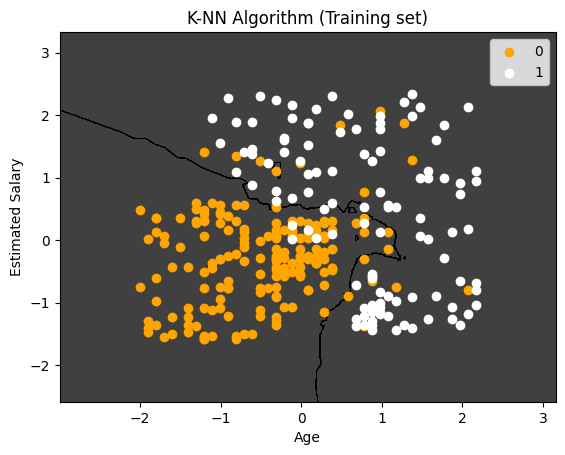

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 =np.meshgrid(np.arange(start = x_set[:,
0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:,
1].max() + 1, step = 0.01))
plt.contourf(x1, x2,
classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1. shape), alpha = 0.75, cmap =
ListedColormap(('black','black' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c= ListedColormap(('orange', 'white'))(i), label = j)
  plt.title('K-NN Algorithm (Training set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test Result**

<ipython-input-14-8d788504b0db>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c= ListedColormap(('orange','white'))(i), label = j)


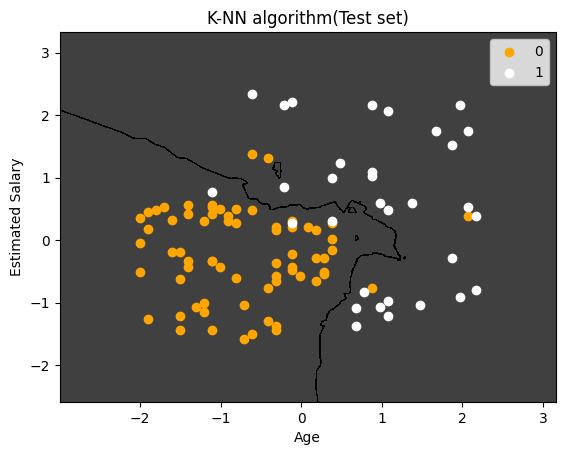

In [14]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:,
0].min() - 1, stop = x_set[:, 0].max() + 1, step=0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:,
1].max() + 1, step = 0.01))
plt.contourf(x1, x2,
classifier.predict(np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1. shape), alpha = 0.75, cmap =
ListedColormap(('black', 'black')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c= ListedColormap(('orange','white'))(i), label = j)
  plt.title('K-NN algorithm(Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
plt.legend()
plt.show()